In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
symbols = [
    "AAPL", "GOOGL", "MRK", "MSFT", "AMZN", "META", "CRM", "NKE", "T", "NVDA",
    "BRK-B", "JPM", "ORCL", "V", "JNJ", "WMT", "PG", "MA", "DIS", "HD",
    "BAC", "XOM", "PFE", "KO", "PEP", "CSCO", "ADBE", "NFLX", "INTC"
]

data = []
for symbol in symbols:
    try:
        stock = yf.Ticker(symbol).info
        data.append({
            'symbol': symbol,
            'marketCap': stock.get('marketCap', 0),
            'trailingPE': stock.get('trailingPE', 0)
        })
    except Exception as e:
        print(f"Eroare la {symbol}: {e}")
        data.append({
            'symbol': symbol,
            'marketCap': 0,
            'trailingPE': 0
        })

df = pd.DataFrame(data)
df = df.fillna(0)  
df.head()

,symbol,marketCap,trailingPE
0,AAPL,2990296530944,31.136860
1,GOOGL,2104002609152,19.296875
2,MRK,194830811136,11.277616
3,MSFT,3424096878592,35.574516
4,AMZN,2187190730752,33.553750


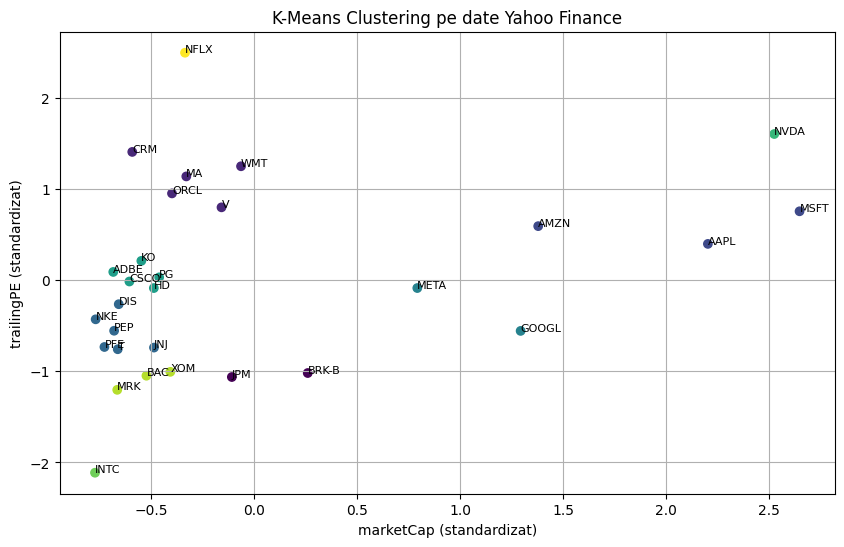

,symbol,Cluster
0,AAPL,2
1,GOOGL,4
2,MRK,8
3,MSFT,2
4,AMZN,2
5,META,4
6,CRM,1
7,NKE,3
8,T,3
9,NVDA,6


In [ ]:

features = ['marketCap', 'trailingPE']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
for i, txt in enumerate(df['symbol']):
    plt.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), fontsize=8)
plt.title('K-Means Clustering pe date Yahoo Finance')
plt.xlabel('marketCap (standardizat)')
plt.ylabel('trailingPE (standardizat)')
plt.grid(True)
plt.show()


df[['symbol', 'Cluster']]


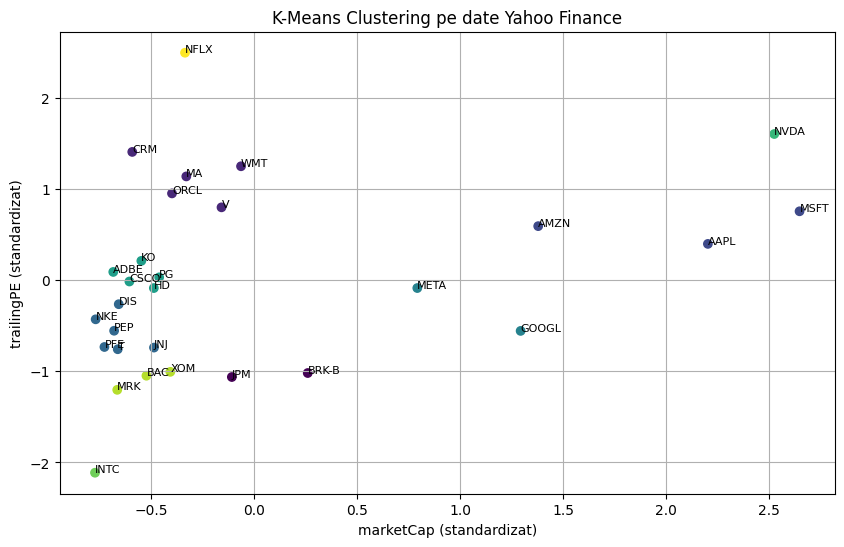

,symbol,Cluster
0,AAPL,2
1,GOOGL,4
2,MRK,8
3,MSFT,2
4,AMZN,2
5,META,4
6,CRM,1
7,NKE,3
8,T,3
9,NVDA,6


In [ ]:

features = ['marketCap', 'trailingPE']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
for i, txt in enumerate(df['symbol']):
    plt.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), fontsize=8)
plt.title('K-Means Clustering pe date Yahoo Finance')
plt.xlabel('marketCap (standardizat)')
plt.ylabel('trailingPE (standardizat)')
plt.grid(True)
plt.show()


df[['symbol', 'Cluster']]

In [ ]:

!pip install transformers --quiet


from transformers import pipeline, set_seed
import torch
import time


In [9]:
generator = pipeline('text-generation', model='gpt2', device=0 if torch.cuda.is_available() else -1)
set_seed(42)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:

gpt2_summaries = []

for symbol in df['symbol']:
    try:
        info = yf.Ticker(symbol).info
        summary = info.get("longBusinessSummary", "")
        if summary:
            prompt = f"Summarize the business of {symbol}: {summary[:400]}"
            result = generator(prompt, max_length=60, num_return_sequences=1)[0]['generated_text']
            cleaned = result.replace(prompt, '').strip()
            gpt2_summaries.append(cleaned)
        else:
            gpt2_summaries.append("No summary available.")
        print(f"✅ {symbol}")
        time.sleep(0.5)
    except Exception as e:
        print(f"⚠️ Error at {symbol}: {e}")
        gpt2_summaries.append("Error")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ AAPL


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ GOOGL


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ MRK


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ MSFT


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ AMZN


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ META


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ CRM


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ NKE


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ T


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ NVDA


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ BRK-B


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ JPM


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ ORCL


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ V


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ JNJ


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ WMT


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ PG


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ MA


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ DIS


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ HD


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ BAC


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ XOM


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ PFE


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ KO


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ PEP


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ CSCO


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ ADBE


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ NFLX


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✅ INTC


In [11]:
df['GPT2_Summary'] = gpt2_summaries
df[['symbol', 'Cluster', 'GPT2_Summary']].head()


,symbol,Cluster,GPT2_Summary
0,AAPL,2,and a line of personal computers. AAPL also of...
1,GOOGL,4,", Google Cloud, and Other Bets segment include..."
2,MRK,8,"nutrition, and veterinary medicine. Pharmaceut..."
3,MSFT,2,365 management solutions. MSFT includes an int...
4,AMZN,2,).\n\nThe following is a description of the bu...


In [13]:
import networkx as nx


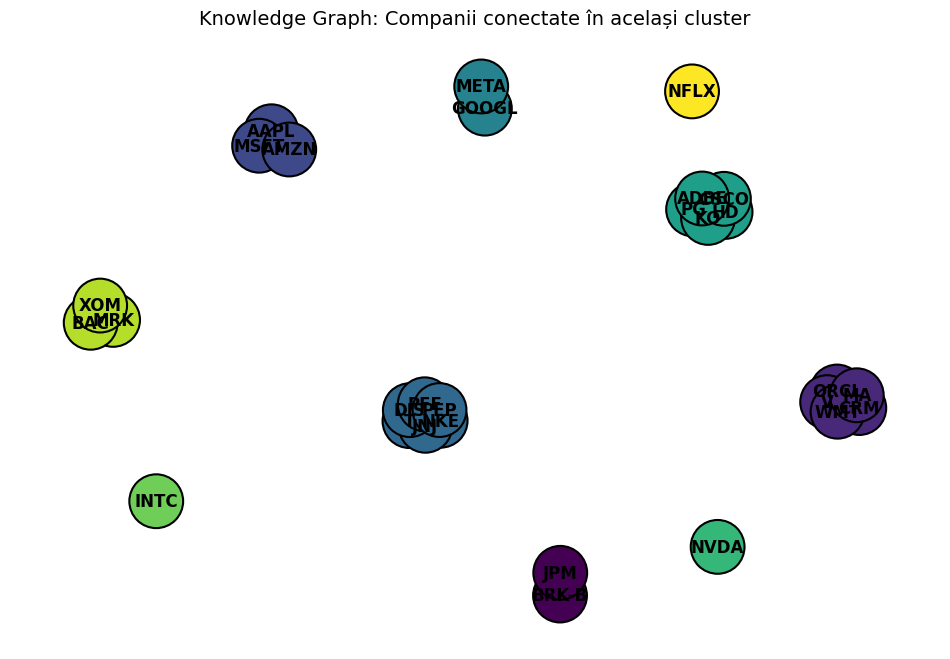

In [ ]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)


colors = [df[df['symbol'] == node]['Cluster'].values[0] for node in G.nodes]


nx.draw_networkx_nodes(
    G, pos,
    node_size=1500,
    node_color=colors,
    cmap=plt.cm.viridis,
    edgecolors='black',     
    linewidths=1.5
)


nx.draw_networkx_edges(G, pos, alpha=0.5)


nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("Knowledge Graph: Companii conectate în același cluster", fontsize=14)
plt.axis('off')
plt.show()
